In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [74]:
ham_veri = pd.read_csv("/home/serkan/Belgeler/yillar/2022-2023/bilsem22_23/2022-oyg2-s1/yapay_zeka/water_potability.csv")

In [75]:
ham_veri.head(5) # ilk 5 veri
# ham_veri.tail(5) # son 5 veri

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [76]:
ham_veri.shape

(3276, 10)

In [77]:
ham_veri.isnull().sum() # null yani NaN olan değerleri bul ve her sütun için toplamını göster

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [78]:
ham_veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [79]:
ham_veri.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [80]:
# boş olan hücreleri o sütuna ait ortalama/ortanca değerler ile dolduralım.
veri=ham_veri.fillna(ham_veri.median(),inplace=False)
print(veri.isnull().sum())
veri.info()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [81]:
veri.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


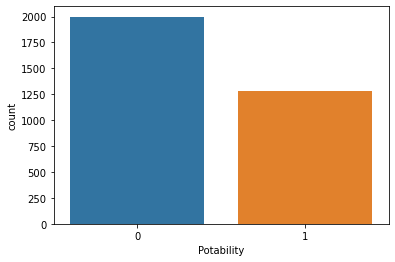

In [82]:
sns.countplot(veri.Potability)
plt.show()

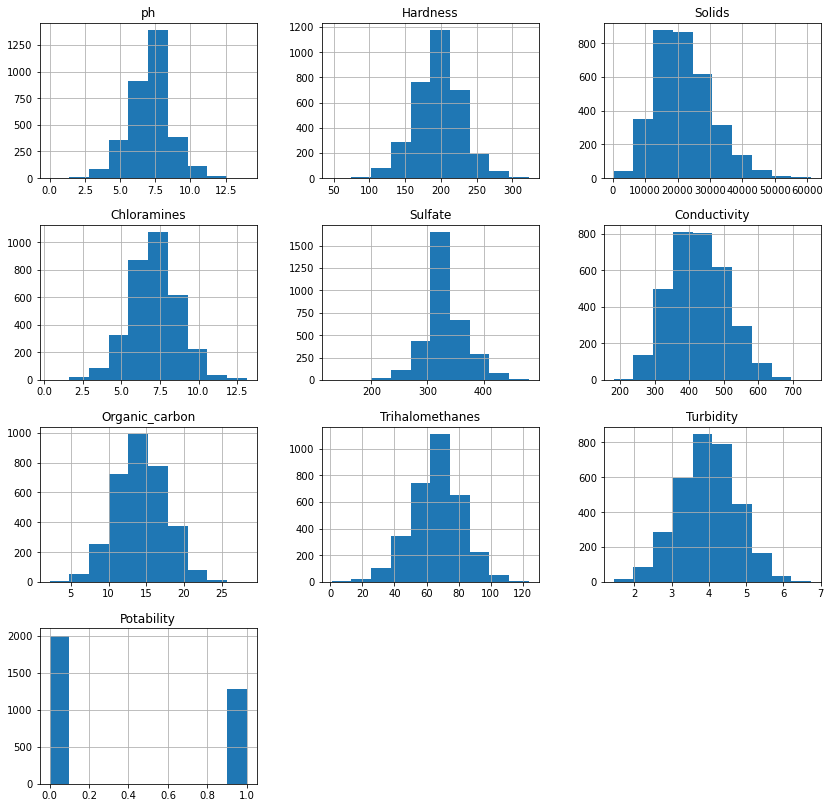

In [83]:
veri.hist(figsize=(14,14))
plt.show()

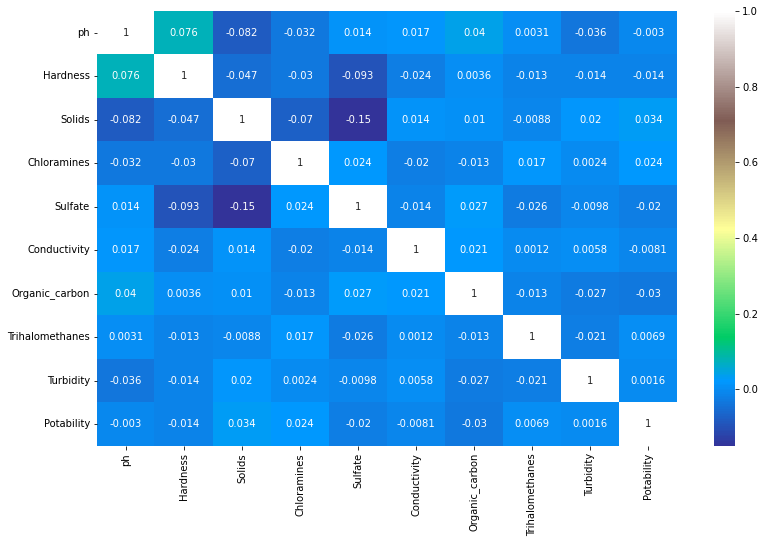

In [84]:
plt.figure(figsize=(13,8))
sns.heatmap(veri.corr(),annot=True,cmap="terrain")
plt.show()


<AxesSubplot:>

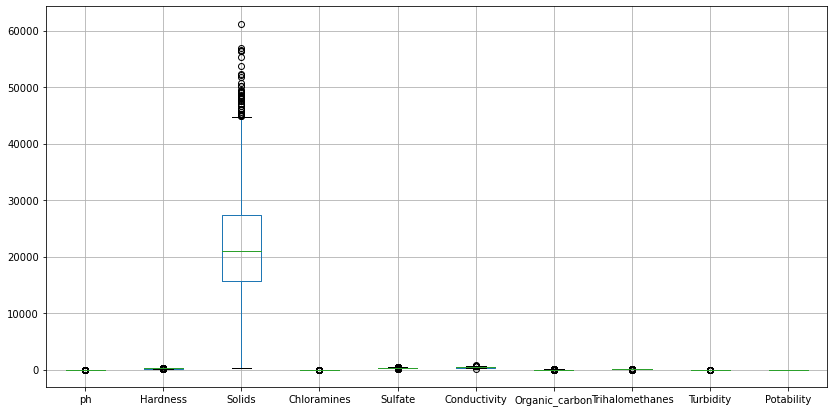

In [85]:
# veri.iloc[:,1:2].boxplot(figsize=(14,7))
veri.boxplot(figsize=(14,7))

In [86]:
# veri_satir_sil = ham_veri.copy()

In [87]:
# veri_satir_sil=veri_satir_sil.dropna(axis=0)
# veri_satir_sil

In [88]:
from sklearn.preprocessing import minmax_scale



In [89]:
# X = veri_satir_sil.iloc[:,0:9].values
X = veri.iloc[:,0:9].values

In [90]:
# y = veri_satir_sil.iloc[:,9].values
y=veri.iloc[:,9].values
y

array([0, 0, 0, ..., 1, 1, 1])

In [91]:
X=minmax_scale(X,feature_range=(0,1))
X

array([[0.50262515, 0.57113901, 0.33609646, ..., 0.31340165, 0.69975313,
        0.28609102],
       [0.26543429, 0.29740043, 0.30061142, ..., 0.49731851, 0.4509993 ,
        0.57679264],
       [0.57850887, 0.64131081, 0.32161885, ..., 0.56201674, 0.5328657 ,
        0.30363656],
       ...,
       [0.67282217, 0.46548556, 0.53910122, ..., 0.33866167, 0.56065454,
        0.34956996],
       [0.36619735, 0.66440723, 0.19148981, ..., 0.34363779, 0.62265916,
        0.61611996],
       [0.56247653, 0.53563505, 0.28048408, ..., 0.5341137 , 0.63247754,
        0.16244074]])

<AxesSubplot:>

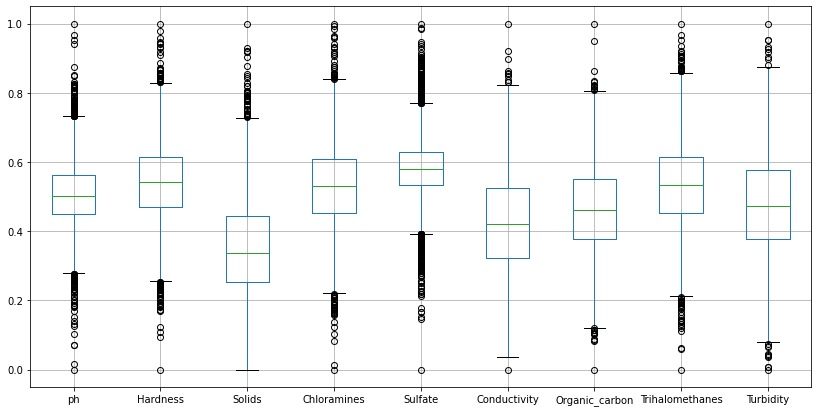

In [92]:
X_df=pd.DataFrame(X,columns=ham_veri.columns[0:9])
X_df.boxplot(figsize=(14,7))

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22) 

In [95]:
from sklearn.metrics import classification_report,confusion_matrix

In [96]:
# verilerimiz ön işlemden geçti. Şimdi sırası ile, k en yakın komşu, destek vektör makinleri, karar ağaçları, bayes sınıflandırıcı ile eğitimler yapıp, sınıflama skorunu ve karışıklık(confusion) matrisini inceleyeceğiz.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


In [97]:
# 1 eğit (fit)
# 2 test verilerinde tahmin yap
# 3 skor hesapla (X_test,y_test)
# 4 karmaşıklık matrisi çizdir (y_test,pred_test)

In [118]:
# 1- knn eğitimi
knn=KNeighborsClassifier(n_neighbors=29)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=29)

In [119]:
# 2-3 skor hesapla
skor_knn=knn.score(X_test,y_test)
print(skor_knn)


0.6676829268292683


In [ ]:
basarimlar=[]
for ks in range(3,98,2):
    knn=KNeighborsClassifier(n_neighbors=ks)
    knn.fit(X_train,y_train)
    skor_knn=knn.score(X_test,y_test)
    basarimlar.append(skor_knn)
    print(f"{ks} komşu acc:{skor_knn}")

print(max(basarimlar))

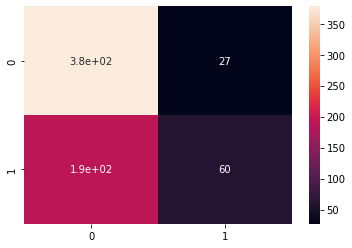

In [120]:
pred_test=knn.predict(X_test)
cf_knn=confusion_matrix(y_test,pred_test)
sns.heatmap(data=cf_knn,annot=True)
plt.show()

In [138]:
# destek vektör makineleri
# 1- dvm eğitimi
dvm = SVC(C=0.8)
dvm.fit(X_train,y_train)


SVC(C=0.8)

In [137]:
#2/3 tahminleme skor

skor_dvm=dvm.score(X_test,y_test)
print(skor_dvm) 

0.6798780487804879


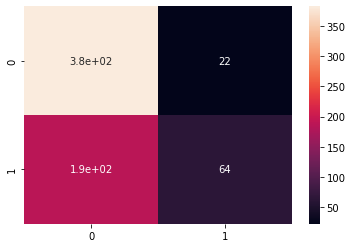

In [123]:
pred_test_dvm = dvm.predict(X_test)
cf_dvm = confusion_matrix(y_test,pred_test_dvm)
sns.heatmap(cf_dvm,annot=True)
plt.show()

In [143]:
# 1- karar ağacı eğitimi
dt = DecisionTreeClassifier(criterion="entropy")
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [144]:
#2- tahminleme skoru

skor_dt= dt.score(X_test,y_test)

print(skor_dt)

0.5853658536585366
